In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('US_Accidents_March23.csv')

In [9]:
# Data preprocessing
df = df.dropna()  # Simplified for example, better to handle missing values appropriately
features = df[['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']]  # Example features
target = df['Severity']

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [11]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Regression Analysis
regression_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor()
}

In [13]:
regression_results = {}
for name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    regression_results[name] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R² Score': r2_score(y_test, y_pred)
    }

In [14]:
# Display regression results
regression_results_df = pd.DataFrame(regression_results).T
print('Regression Results:')
print(regression_results_df)

Regression Results:
                              MSE      RMSE  R² Score
Linear Regression        0.147364  0.383880  0.001891
Random Forest Regressor  0.146992  0.383395  0.004412


In [15]:
# Classification Analysis
classification_models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier()
}

In [16]:
classification_results = {}
for name, model in classification_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    classification_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

C:\Users\Muha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# Display classification results
classification_results_df = pd.DataFrame(classification_results).T
print('Classification Results:')
print(classification_results_df)

Classification Results:
                          Accuracy  Precision    Recall  F1 Score
Logistic Regression       0.941877   0.890636  0.941877  0.913701
Random Forest Classifier  0.941150   0.914673  0.941150  0.919146


In [18]:
# Feature Importance from Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=features.columns).sort_values(ascending=False)

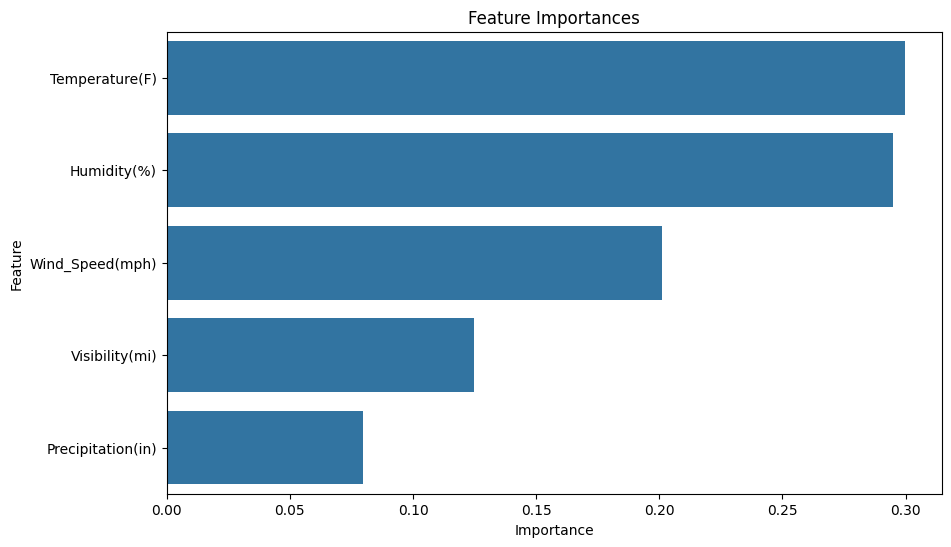

In [19]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

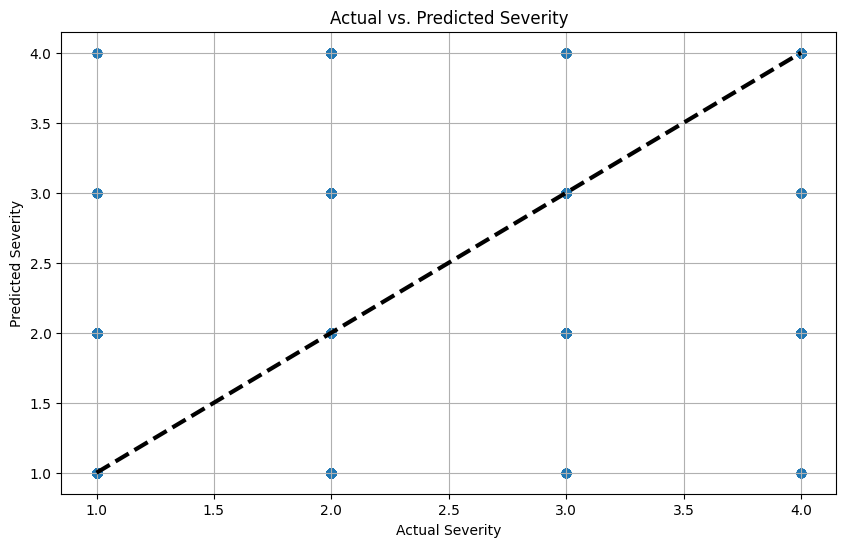

In [20]:
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted severity
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Severity')
plt.ylabel('Predicted Severity')
plt.title('Actual vs. Predicted Severity')
plt.grid(True)
plt.show()

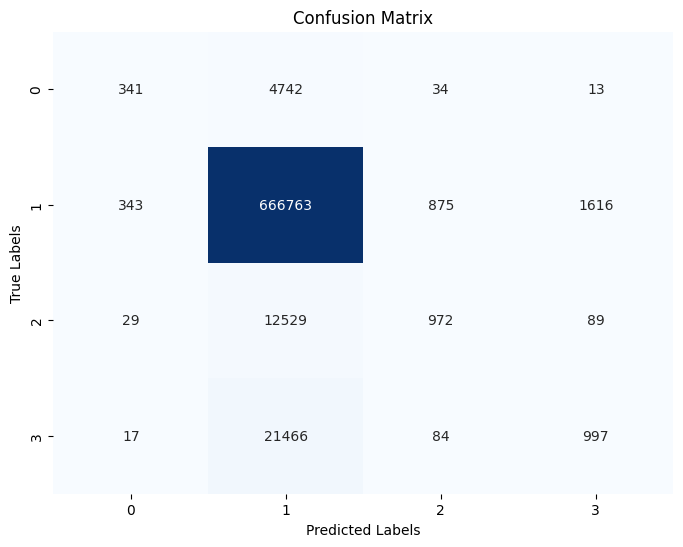

In [21]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

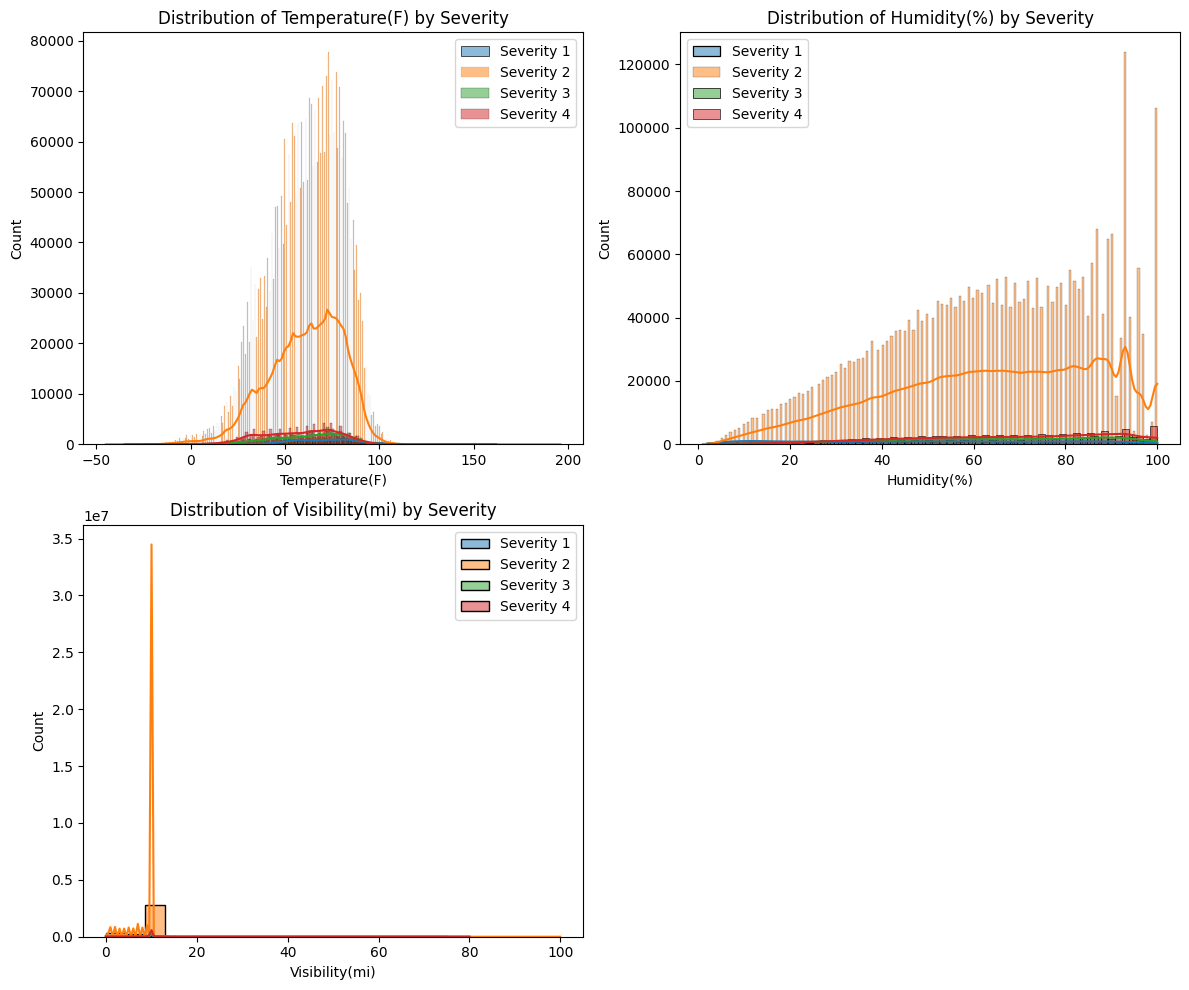

In [22]:
plt.figure(figsize=(12, 10))

# Features of interest
features_of_interest = ['Temperature(F)', 'Humidity(%)', 'Visibility(mi)']

# Determine the number of rows and columns dynamically based on the number of features
num_features = len(features_of_interest)
num_rows = (num_features + 1) // 2  # Ensure enough rows for all features
num_cols = 2  # Fixed two columns

for i, feature in enumerate(features_of_interest):
    plt.subplot(num_rows, num_cols, i + 1)
    for severity_level in np.unique(target):
        sns.histplot(df[df['Severity'] == severity_level][feature], kde=True, label=f'Severity {severity_level}', alpha=0.5)
    plt.title(f'Distribution of {feature} by Severity')
    plt.xlabel(feature)
    plt.legend()

plt.tight_layout()
plt.show()


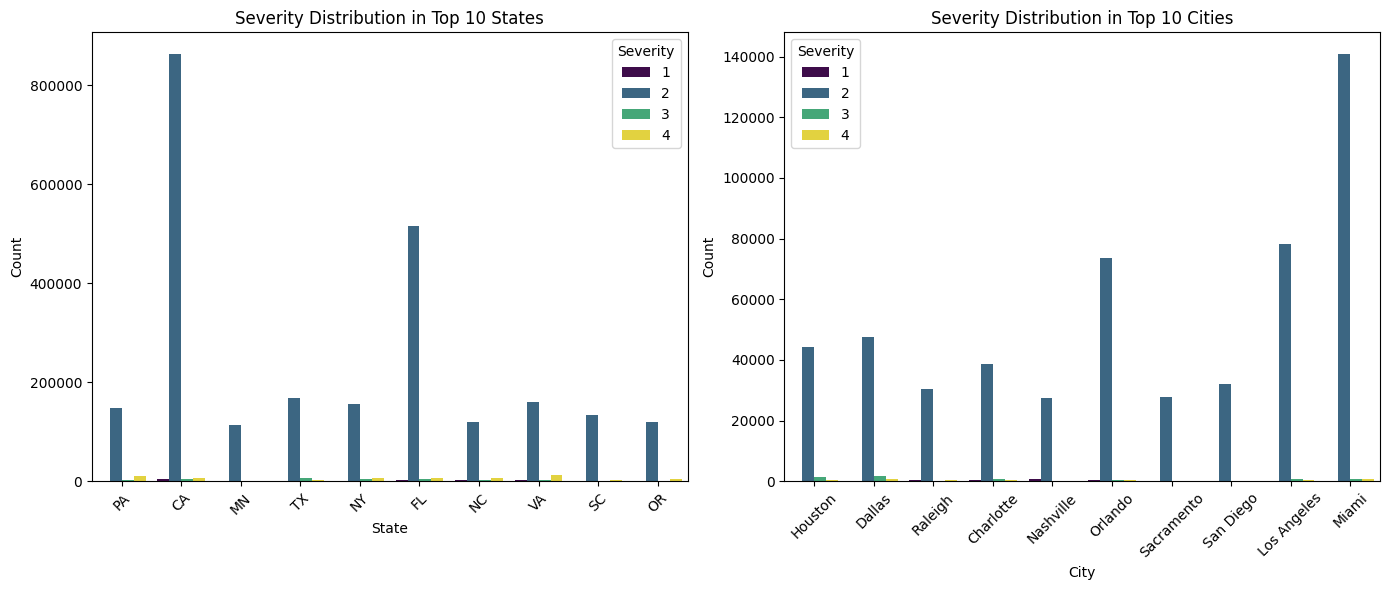

In [23]:
plt.figure(figsize=(14, 6))

# Top 10 States by Accident Count
top_states = df['State'].value_counts().nlargest(10).index
df_top_states = df[df['State'].isin(top_states)]

# Plotting Severity distribution by State
plt.subplot(1, 2, 1)
sns.countplot(x='State', hue='Severity', data=df_top_states, palette='viridis')
plt.title('Severity Distribution in Top 10 States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Severity')

# Top 10 Cities by Accident Count
top_cities = df['City'].value_counts().nlargest(10).index
df_top_cities = df[df['City'].isin(top_cities)]

# Visualizing Severity distribution by City (top 10 cities by accident count)
plt.subplot(1, 2, 2)
sns.countplot(x='City', hue='Severity', data=df_top_cities, palette='viridis')
plt.title('Severity Distribution in Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Severity')

plt.tight_layout()
plt.show()